In [25]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
'''
Analysis of the following four NSE stocks from January 1st, 2016 to the current date:
1. Wockhardt Limited
2. Kaveri Seed Company Ltd.
3. Rajesh Exports Ltd.
4. Mirza International Ltd.
'''
from pandas.io.data import DataReader

from datetime import datetime
end = datetime.now()
start = '2016-01-01'

WockPharma = DataReader('WOCKPHARMA.NS', 'yahoo', start, end)
KaveriSeed = DataReader('KSCL.NS', 'yahoo', start, end)
RajeshExports = DataReader('RAJESHEXPO.BO', 'yahoo', start, end)
MirzaInt = DataReader('MIRZAINT.NS', 'yahoo', start, end)

In [18]:
WockPharma.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,1537.8,1614.00,1530.85,1603.75,1038300,1582.11
2016-01-04,1599.5,1627.55,1550.10,1578.40,1368100,1557.10
2016-01-05,1585.0,1600.00,1563.10,1579.70,1108300,1558.39
2016-01-06,1584.0,1618.90,1570.15,1576.60,972800,1555.33
2016-01-07,1567.2,1576.00,1536.70,1545.80,739600,1524.94


In [19]:
# Modify column names, so they can be distinguised from one another
WockPharma.columns = ['W_'+str(col) for col in WockPharma.columns]
KaveriSeed.columns = ['K_'+str(col) for col in KaveriSeed.columns]
RajeshExports.columns = ['R_'+str(col) for col in RajeshExports.columns]
MirzaInt.columns = ['M_'+str(col) for col in MirzaInt.columns]

In [24]:
WockPharma.head()

,W_Open,W_High,W_Low,W_Close,W_Volume,W_Adj Close
Date,,,,,,
2016-01-01,1537.8,1614.00,1530.85,1603.75,1038300,1582.11
2016-01-04,1599.5,1627.55,1550.10,1578.40,1368100,1557.10
2016-01-05,1585.0,1600.00,1563.10,1579.70,1108300,1558.39
2016-01-06,1584.0,1618.90,1570.15,1576.60,972800,1555.33
2016-01-07,1567.2,1576.00,1536.70,1545.80,739600,1524.94


In [26]:
WockPharma.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2016-01-01 to 2017-01-11
Data columns (total 6 columns):
W_Open         269 non-null float64
W_High         269 non-null float64
W_Low          269 non-null float64
W_Close        269 non-null float64
W_Volume       269 non-null int64
W_Adj Close    269 non-null float64
dtypes: float64(5), int64(1)
memory usage: 14.7 KB


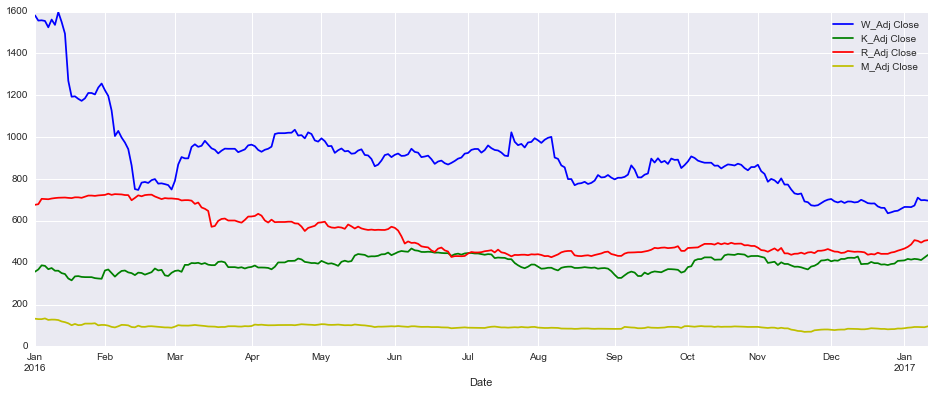

In [40]:
# Plotting the trend in Adjusted-Closing-Prices of the 4 Stocks over the last 1 year
AdjClosingPrices = DataFrame(pd.concat([WockPharma['W_Adj Close'], KaveriSeed['K_Adj Close'], 
                                        RajeshExports['R_Adj Close'], MirzaInt['M_Adj Close']], axis=1))

AdjClosingPrices.plot(figsize=(16,6), color=['b','g','r','y'])

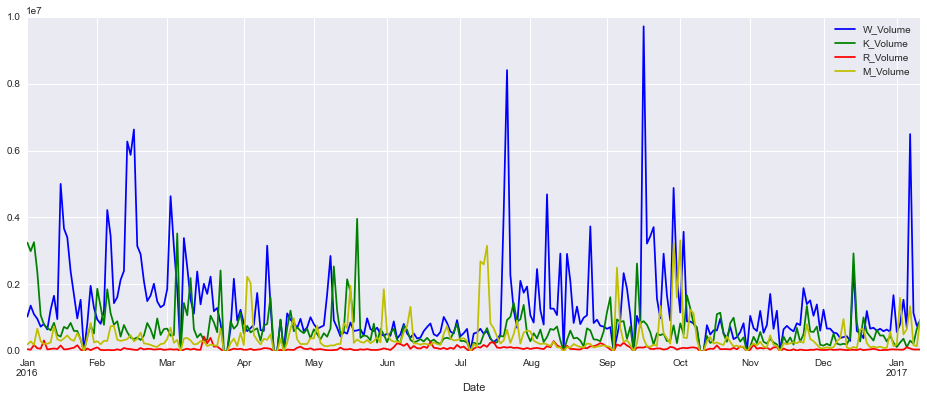

In [42]:
# Plotting the trend in Volume-Traded of the 4 Stocks over the last 1 year
VolumeTraded = DataFrame(pd.concat([WockPharma['W_Volume'], KaveriSeed['K_Volume'], 
                                    RajeshExports['R_Volume'], MirzaInt['M_Volume']], axis=1))

VolumeTraded.plot(figsize=(16,6), color=['b','g','r','y'])

# Note the scale of the graph (10s of Millions)

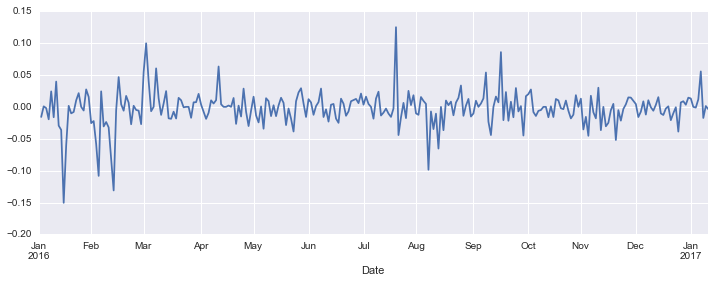

In [44]:
# Daily Return of a stock
WockPharma['Daily Return'] = WockPharma['W_Adj Close'].pct_change()
WockPharma['Daily Return'].plot(figsize=(12,4))

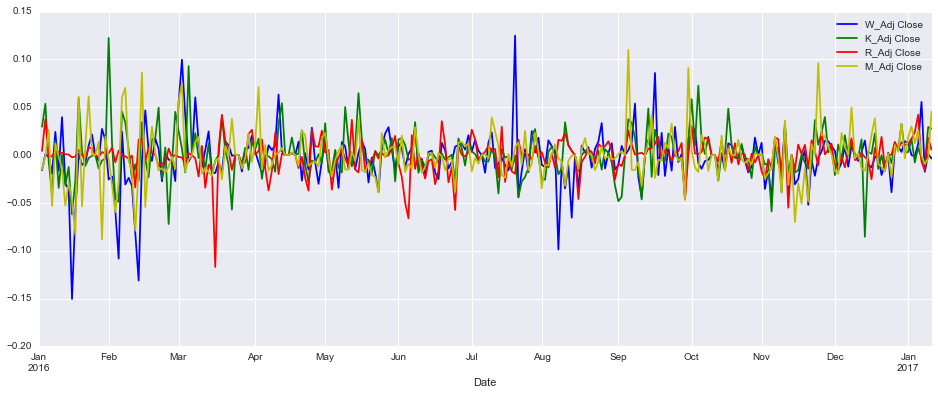

In [54]:
DailyReturns = AdjClosingPrices.pct_change()
DailyReturns.plot(legend=True, figsize=(16,6), colors=['b','g','r','y'])

# This plot shows that Wockhardt and Mirza are a bit erratic in nature while the other two aren't (relatively).